In [1]:
pip install pandas numpy scikit-learn tensorflow transformers matplotlib seaborn

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv("D:\Challenge 2\DT2\dt2 project dataset\Twitter_Data.csv")

In [3]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
5           kiya tho refresh maarkefir comment karo        0.0
6  surat women perform yagna seeks divine grace f...       0.0
7  this comes from cabinet which has scholars lik...       0.0
8  with upcoming election india saga going import...       1.0
9                         gandhi wa

In [4]:
import pandas as pd

# Assuming your DataFrame is named df
df.columns = ['tweet', 'sentiment_score']

# Add a new column 'sentiment'
df['sentiment'] = df['sentiment_score'].map({-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'})

# Drop the 'sentiment_score' column if you don't need it anymore
df = df[['tweet', 'sentiment']]

# Display the updated DataFrame
print(df.head())
print(df.info())

                                               tweet sentiment
0  when modi promised “minimum government maximum...  negative
1  talk all the nonsense and continue all the dra...   neutral
2  what did just say vote for modi  welcome bjp t...  positive
3  asking his supporters prefix chowkidar their n...  positive
4  answer who among these the most powerful world...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet      162976 non-null  object
 1   sentiment  162973 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB
None


In [5]:
# Check for missing values
print(df.isnull().sum())


tweet        4
sentiment    7
dtype: int64


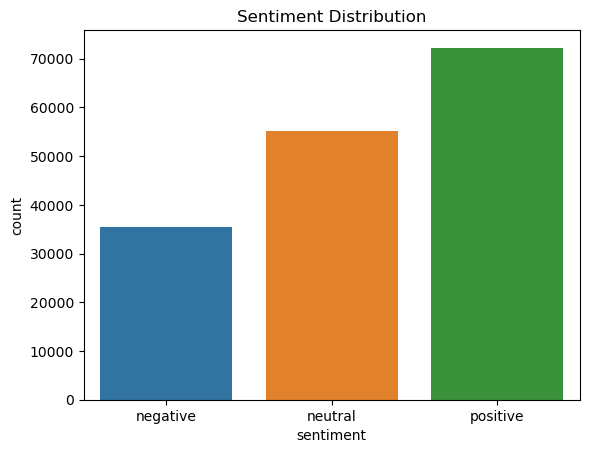

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Drop rows with missing values in 'sentiment' column
df = df.dropna(subset=['sentiment'])

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [7]:
df['sentiment'].value_counts()


positive    72250
neutral     55213
negative    35510
Name: sentiment, dtype: int64

In [8]:
df.isnull().sum()


tweet        4
sentiment    0
dtype: int64

In [9]:
import re

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Add more preprocessing steps if needed
        return text
    else:
        return ""

df['clean_text'] = df['tweet'].apply(preprocess_text)


In [10]:
import nltk
# Download the Punkt resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_text'].apply(word_tokenize)


In [12]:
from nltk import FreqDist

all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)


[('modi', 155632),
 ('the', 104499),
 ('and', 67357),
 ('for', 52451),
 ('you', 38981),
 ('not', 30334),
 ('india', 29180),
 ('will', 28948),
 ('this', 28617),
 ('that', 28194)]

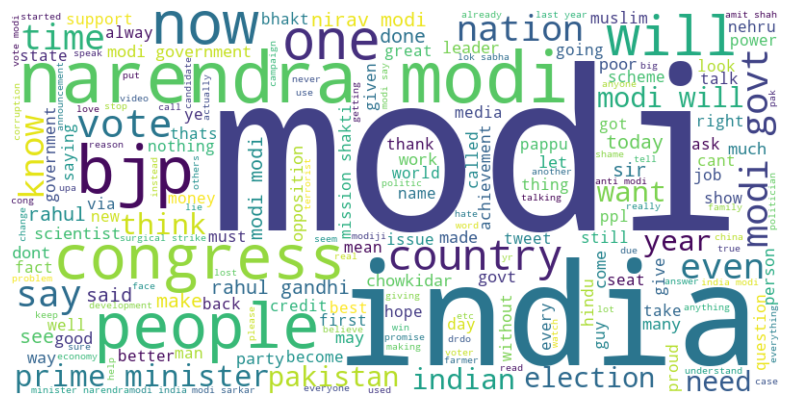

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
# Example: Text length feature
df['text_length'] = df['clean_text'].apply(len)


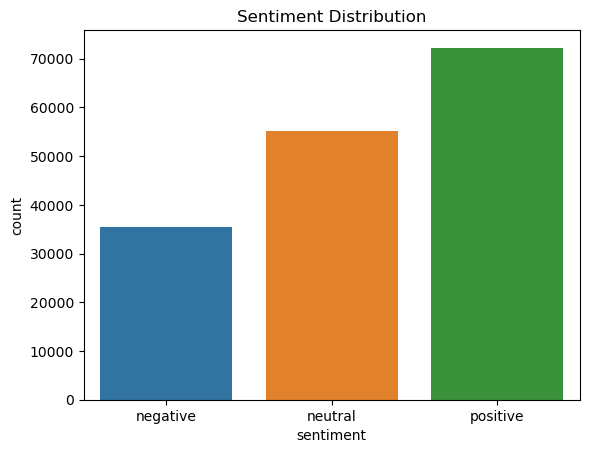

In [15]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [16]:
import pandas as pd
df1 = pd.read_csv(r"D:\Challenge 2\DT2\dt2 project dataset\twitter_validation.csv")
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162973 entries, 0 to 162979
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   tweet        162969 non-null  object
 1   sentiment    162973 non-null  object
 2   clean_text   162973 non-null  object
 3   tokens       162973 non-null  object
 4   text_length  162973 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.5+ MB
None
                                               tweet sentiment  \
0  when modi promised “minimum government maximum...  negative   
1  talk all the nonsense and continue all the dra...   neutral   
2  what did just say vote for modi  welcome bjp t...  positive   
3  asking his supporters prefix chowkidar their n...  positive   
4  answer who among these the most powerful world...  positive   
5           kiya tho refresh maarkefir comment karo    neutral   
6  surat women perform yagna seeks divine grace f...   neutral   
7  this comes

In [17]:
# Assuming your DataFrame is named 'df'
selected_columns = df1.iloc[:, [2, 3]]  # Select columns at index 2 and 3

# Rename the columns for clarity
selected_columns.columns = ['tweet', 'sentiment']

# Display the resulting DataFrame
print(selected_columns)


          tweet                                          sentiment
0       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1      Negative  @Microsoft Why do I pay for WORD when it funct...
2      Negative  CSGO matchmaking is so full of closet hacking,...
3       Neutral  Now the President is slapping Americans in the...
4      Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..          ...                                                ...
994  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
995  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Positive  Today sucked so it’s time to drink wine n play...
997    Positive  Bought a fraction of Microsoft today. Small wins.
998     Neutral  Johnson & Johnson to stop selling talc baby po...

[999 rows x 2 columns]


In [18]:
# Check for missing values
print(df1.isnull().sum())

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [19]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [20]:
# Assuming your DataFrame is named 'df'
df1 = df1[['Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']]

# Rename the columns for clarity
df1.columns = ['sentiment', 'tweet']

# Display the resulting DataFrame
print(df1)


      sentiment                                              tweet
0       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1      Negative  @Microsoft Why do I pay for WORD when it funct...
2      Negative  CSGO matchmaking is so full of closet hacking,...
3       Neutral  Now the President is slapping Americans in the...
4      Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..          ...                                                ...
994  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
995  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Positive  Today sucked so it’s time to drink wine n play...
997    Positive  Bought a fraction of Microsoft today. Small wins.
998     Neutral  Johnson & Johnson to stop selling talc baby po...

[999 rows x 2 columns]


In [21]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  999 non-null    object
 1   tweet      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None
  sentiment                                              tweet
0   Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1  Negative  @Microsoft Why do I pay for WORD when it funct...
2  Negative  CSGO matchmaking is so full of closet hacking,...
3   Neutral  Now the President is slapping Americans in the...
4  Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
5  Positive  Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6  Positive  Rocket League, Sea of Thieves or Rainbow Six: ...
7  Positive  my ass still knee-deep in Assassins Creed Odys...
8  Negative  FIX IT JESUS ! Please FIX IT ! What In the wor...
9  Positive  The professional dota 2 scene is fucking explo...


In [22]:
# Assuming your DataFrame is named 'df1'
df1 = df1[df1['sentiment'] != 'Irrelevant']

# Reset the index after filtering
df1.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df1)


    sentiment                                              tweet
0     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1    Negative  @Microsoft Why do I pay for WORD when it funct...
2    Negative  CSGO matchmaking is so full of closet hacking,...
3     Neutral  Now the President is slapping Americans in the...
4    Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..        ...                                                ...
823  Negative  Please explain how this is possible! How can t...
824  Positive  Good on Sony. As much as I want to see the new...
825  Positive  Today sucked so it’s time to drink wine n play...
826  Positive  Bought a fraction of Microsoft today. Small wins.
827   Neutral  Johnson & Johnson to stop selling talc baby po...

[828 rows x 2 columns]


In [23]:
# Reorder the columns
df1 = df1[['tweet', 'sentiment']]

# Display the resulting DataFrame
print(df1)


                                                 tweet sentiment
0    BBC News - Amazon boss Jeff Bezos rejects clai...   Neutral
1    @Microsoft Why do I pay for WORD when it funct...  Negative
2    CSGO matchmaking is so full of closet hacking,...  Negative
3    Now the President is slapping Americans in the...   Neutral
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...  Negative
..                                                 ...       ...
823  Please explain how this is possible! How can t...  Negative
824  Good on Sony. As much as I want to see the new...  Positive
825  Today sucked so it’s time to drink wine n play...  Positive
826  Bought a fraction of Microsoft today. Small wins.  Positive
827  Johnson & Johnson to stop selling talc baby po...   Neutral

[828 rows x 2 columns]


In [24]:
import re

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Add more preprocessing steps if needed
        return text
    else:
        return ""

df1['clean_text'] = df1['tweet'].apply(preprocess_text)


In [25]:
from nltk.tokenize import word_tokenize

df1['tokens'] = df1['clean_text'].apply(word_tokenize)

In [26]:
from nltk import FreqDist

all_words1 = [word for tokens in df1['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)


[('modi', 155632),
 ('the', 104499),
 ('and', 67357),
 ('for', 52451),
 ('you', 38981),
 ('not', 30334),
 ('india', 29180),
 ('will', 28948),
 ('this', 28617),
 ('that', 28194)]

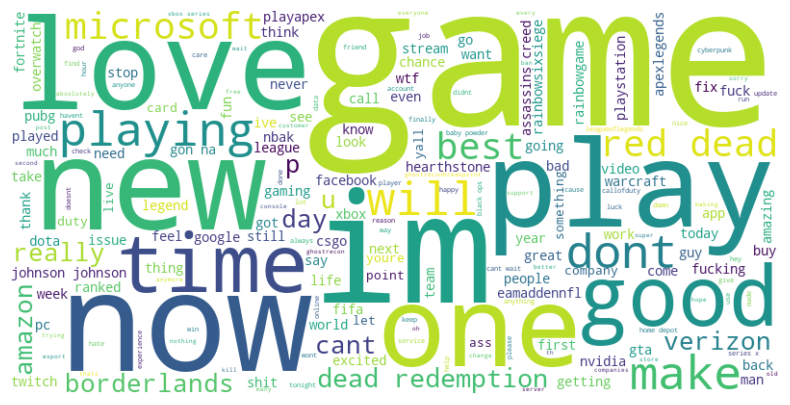

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(all_words1))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

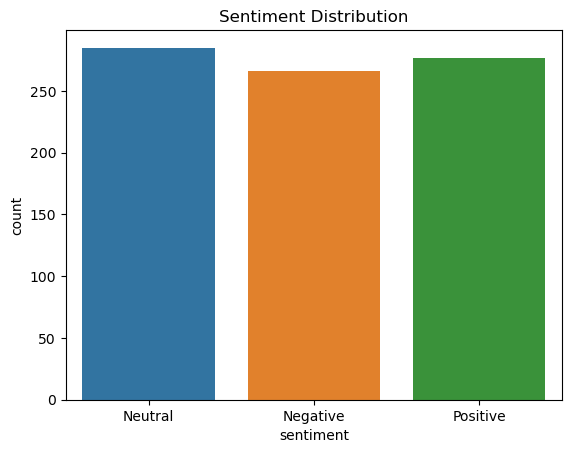

In [28]:
sns.countplot(x='sentiment', data=df1)
plt.title('Sentiment Distribution')
plt.show()


In [29]:
print(df)
print(df1)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  negative   
1       talk all the nonsense and continue all the dra...   neutral   
2       what did just say vote for modi  welcome bjp t...  positive   
3       asking his supporters prefix chowkidar their n...  positive   
4       answer who among these the most powerful world...  positive   
...                                                   ...       ...   
162975  why these 456 crores paid neerav modi not reco...  negative   
162976  dear rss terrorist payal gawar what about modi...  negative   
162977  did you cover her interaction forum where she ...   neutral   
162978  there big project came into india modi dream p...   neutral   
162979  have you ever listen about like gurukul where ...  positive   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [30]:
import pandas as pd

# Assuming df and df1 are your two dataframes
new_df = pd.concat([df, df1], ignore_index=True)

# Optional: Save the merged dataframe to a new CSV file
new_df.to_csv('combinedtweets_dataset.csv', index=False)


In [31]:
print(new_df)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  negative   
1       talk all the nonsense and continue all the dra...   neutral   
2       what did just say vote for modi  welcome bjp t...  positive   
3       asking his supporters prefix chowkidar their n...  positive   
4       answer who among these the most powerful world...  positive   
...                                                   ...       ...   
163796  Please explain how this is possible! How can t...  Negative   
163797  Good on Sony. As much as I want to see the new...  Positive   
163798  Today sucked so it’s time to drink wine n play...  Positive   
163799  Bought a fraction of Microsoft today. Small wins.  Positive   
163800  Johnson & Johnson to stop selling talc baby po...   Neutral   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [32]:
print(new_df.head(20))

                                                tweet sentiment  \
0   when modi promised “minimum government maximum...  negative   
1   talk all the nonsense and continue all the dra...   neutral   
2   what did just say vote for modi  welcome bjp t...  positive   
3   asking his supporters prefix chowkidar their n...  positive   
4   answer who among these the most powerful world...  positive   
5            kiya tho refresh maarkefir comment karo    neutral   
6   surat women perform yagna seeks divine grace f...   neutral   
7   this comes from cabinet which has scholars lik...   neutral   
8   with upcoming election india saga going import...  positive   
9                          gandhi was gay does modi    positive   
10  things like demonetisation gst goods and servi...  positive   
11  hope tuthukudi people would prefer honest well...  positive   
12                  calm waters wheres the modi wave   positive   
13  one vote can make all the difference anil kapo...   neutra

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_advanced(text):
    text = str(text).lower()  # Ensure text is a string
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

new_df['tokens_advanced'] = new_df['clean_text'].apply(preprocess_text_advanced)


In [35]:
new_df[['clean_text', 'tokens_advanced']].head()


,clean_text,tokens_advanced
0,when modi promised minimum government maximum ...,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,"[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,"[answer, among, powerful, world, leader, today..."


In [36]:
# Drop rows with missing values in the 'clean_text' column
new_df = new_df.dropna(subset=['clean_text'])
# Drop duplicate rows based on 'clean_text'
new_df = new_df.drop_duplicates(subset=['clean_text'])


In [37]:
# Assuming new_df is your combined DataFrame
# Calculate text_length for rows where it is null
new_df.loc[new_df['text_length'].isnull(), 'text_length'] = new_df.loc[new_df['text_length'].isnull(), 'tweet'].apply(len)

# Verify that there are no more null values in 'text_length'
print(new_df['text_length'].isnull().sum())


0


In [38]:
# Assuming your DataFrame is named new_df
new_df['sentiment'] = new_df['sentiment'].str.lower()

# Mapping to combine similar classes
sentiment_mapping = {
    'positive': 'Positive',
    'neutral': 'Neutral',
    'negative': 'Negative'
}

new_df['sentiment'] = new_df['sentiment'].map(sentiment_mapping)

new_df.head(10)


,tweet,sentiment,clean_text,tokens,text_length,tokens_advanced
0,when modi promised “minimum government maximum...,Negative,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...",208.0,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,Neutral,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...",68.0,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,Positive,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...",117.0,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,Positive,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...",212.0,"[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,Positive,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...",81.0,"[answer, among, powerful, world, leader, today..."
5,kiya tho refresh maarkefir comment karo,Neutral,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]",40.0,"[kiya, tho, refresh, maarkefir, comment, karo]"
6,surat women perform yagna seeks divine grace f...,Neutral,surat women perform yagna seeks divine grace f...,"[surat, women, perform, yagna, seeks, divine, ...",76.0,"[surat, woman, perform, yagna, seek, divine, g..."
7,this comes from cabinet which has scholars lik...,Neutral,this comes from cabinet which has scholars lik...,"[this, comes, from, cabinet, which, has, schol...",84.0,"[come, cabinet, scholar, like, modi, smriti, h..."
8,with upcoming election india saga going import...,Positive,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...",156.0,"[upcoming, election, india, saga, going, impor..."
9,gandhi was gay does modi,Positive,gandhi was gay does modi,"[gandhi, was, gay, does, modi]",26.0,"[gandhi, gay, modi]"


In [39]:
small_df = new_df.sample(frac=0.1, random_state=42)
print(small_df)

                                                    tweet sentiment  \
112101  hello narendra modi jiyou must understand what...   Neutral   
91275   that percent people who said modi should inves...   Neutral   
138739  not irrelevant this govt fooling voters they c...  Negative   
21635   clear statement modi shah duo wont able wriggl...  Positive   
99112   main bhi chowkidar song sid chandra for narend...  Positive   
...                                                   ...       ...   
8963    prime minister narendra modi arrives bjp headq...   Neutral   
39140   this true indian culture adopted all over than...  Positive   
126410  chal chutiye chowkidar kaheen kbow how much ri...  Positive   
121524  raga economic advisor says indian economy has ...  Positive   
116452       now faces the possibility extradition india    Neutral   

                                               clean_text  \
112101  hello narendra modi jiyou must understand what...   
91275   that percent peop

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming df is your dataframe with 'clean_text' and 'sentiment' columns
X = small_df['clean_text'].values
y = small_df['sentiment'].values

# Convert labels to numerical values
le = LabelEncoder()
y_train = le.fit_transform(y)

# Tokenize and pad sequences
max_words = 10000  # Adjust based on your dataset
max_len = 100  # Adjust based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_train, test_size=0.2, random_state=42)

# Fit the LabelEncoder on the union of training and test labels
all_labels = np.union1d(y_train, y_test)
le = LabelEncoder()
le.fit(all_labels)

# Use the same LabelEncoder instance to transform labels in the test set
y_test_encoded = le.transform(y_test)

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (Negative, Neutral, Positive)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_probabilities = model.predict(X_test)
y_pred = tf.argmax(y_pred_probabilities, axis=1).numpy()

# Convert y_test to numerical values
y_test_numerical = y_test_encoded

accuracy = accuracy_score(y_test_numerical, y_pred)
report = classification_report(y_test_numerical, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Epoch 1/5
164/164 [==============================] - 14s 73ms/step - loss: 1.0655 - accuracy: 0.4346 - val_loss: 1.0583 - val_accuracy: 0.4560
Epoch 2/5
164/164 [==============================] - 11s 66ms/step - loss: 1.0642 - accuracy: 0.4382 - val_loss: 1.0593 - val_accuracy: 0.4560
Epoch 3/5
164/164 [==============================] - 11s 69ms/step - loss: 1.0634 - accuracy: 0.4382 - val_loss: 1.0592 - val_accuracy: 0.4560
Epoch 4/5
164/164 [==============================] - 11s 67ms/step - loss: 1.0632 - accuracy: 0.4382 - val_loss: 1.0578 - val_accuracy: 0.4560
Epoch 5/5
103/103 [==============================] - 2s 15ms/step
Accuracy: 0.4400611620795107
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       716
           1       0.00      0.00      0.00      1115
           2       0.44      1.00      0.61      1439

    accuracy                           0.44      3270
   macro avg       0.15      0.33    

C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming df is your dataframe with 'clean_text' and 'sentiment' columns
X = small_df['clean_text'].values
y = small_df['sentiment'].values

# Convert labels to numerical values
le = LabelEncoder()
y_train = le.fit_transform(y)

# Tokenize and pad sequences
max_words = 10000  # Adjust based on your dataset
max_len = 200  # Adjust based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_train, test_size=0.2, random_state=42)

# Fit the LabelEncoder on the union of training and test labels
all_labels = np.union1d(y_train, y_test)
le = LabelEncoder()
le.fit(all_labels)

# Use the same LabelEncoder instance to transform labels in the test set
y_test_encoded = le.transform(y_test)

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (Negative, Neutral, Positive)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_probabilities = model.predict(X_test)
y_pred = tf.argmax(y_pred_probabilities, axis=1).numpy()

# Convert y_test to numerical values
y_test_numerical = y_test_encoded

accuracy = accuracy_score(y_test_numerical, y_pred)
report = classification_report(y_test_numerical, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Epoch 1/5
164/164 [==============================] - 70s 406ms/step - loss: 1.0652 - accuracy: 0.4371 - val_loss: 1.0584 - val_accuracy: 0.4560
Epoch 2/5
164/164 [==============================] - 74s 454ms/step - loss: 1.0642 - accuracy: 0.4382 - val_loss: 1.0604 - val_accuracy: 0.4560
Epoch 3/5
164/164 [==============================] - 73s 446ms/step - loss: 1.0636 - accuracy: 0.4382 - val_loss: 1.0575 - val_accuracy: 0.4560
Epoch 4/5
164/164 [==============================] - 61s 372ms/step - loss: 1.0639 - accuracy: 0.4382 - val_loss: 1.0587 - val_accuracy: 0.4560
Epoch 5/5
103/103 [==============================] - 8s 70ms/step
Accuracy: 0.4400611620795107
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       716
           1       0.00      0.00      0.00      1115
           2       0.44      1.00      0.61      1439

    accuracy                           0.44      3270
   macro avg       0.15      0.33

C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

# Load GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Create an embedding matrix
def create_embedding_matrix(word_index, embeddings_index, embedding_dim):
    num_words = min(max_words, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Load your dataset and preprocess it
# ... (Assuming X_train, X_test, y_train, y_test are already defined)
# Assuming df is your dataframe with 'clean_text' and 'sentiment' columns
X = new_df['clean_text'].values
y = new_df['sentiment'].values

# Convert labels to numerical values
le = LabelEncoder()
y_train = le.fit_transform(y)

# Tokenize and pad sequences
max_words = 10000  # Adjust based on your dataset
max_len = 200  # Adjust based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_train, test_size=0.2, random_state=42)

# Fit the LabelEncoder on the union of training and test labels
all_labels = np.union1d(y_train, y_test)
le = LabelEncoder()
le.fit(all_labels)

# Use the same LabelEncoder instance to transform labels in the test set
y_test_encoded = le.transform(y_test)

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)
# Tokenize and pad sequences
# ... (Assuming tokenizer, max_words, and max_len are already defined)

# Load GloVe embeddings
glove_path = r"C:\Users\91906\Downloads\glove.6B\glove.6B.200d.txt"
glove_embeddings = load_glove_embeddings(glove_path)

# Create embedding matrix
embedding_dim = 200  # Adjust based on the chosen GloVe embedding dimension
embedding_matrix = create_embedding_matrix(tokenizer.word_index, glove_embeddings, embedding_dim)

# Build the LSTM model with pre-trained GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_probabilities = model.predict(X_test)
y_pred = tf.argmax(y_pred_probabilities, axis=1).numpy()

# Convert y_test to numerical values
y_test_numerical = y_test_encoded

accuracy = accuracy_score(y_test_numerical, y_pred)
report = classification_report(y_test_numerical, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Epoch 1/5
1635/1635 [==============================] - 57002s 35s/step - loss: 1.0607 - accuracy: 0.4428 - val_loss: 1.0606 - val_accuracy: 0.4436
Epoch 2/5
1635/1635 [==============================] - 676s 413ms/step - loss: 1.0600 - accuracy: 0.4430 - val_loss: 1.0594 - val_accuracy: 0.4436
Epoch 3/5
1635/1635 [==============================] - 635s 388ms/step - loss: 1.0599 - accuracy: 0.4430 - val_loss: 1.0597 - val_accuracy: 0.4436
Epoch 4/5
1635/1635 [==============================] - 638s 390ms/step - loss: 1.0598 - accuracy: 0.4430 - val_loss: 1.0596 - val_accuracy: 0.4436
Epoch 5/5
1022/1022 [==============================] - 99s 96ms/step
Accuracy: 0.44190953851799747
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7185
           1       0.00      0.00      0.00     11064
           2       0.44      1.00      0.61     14450

    accuracy                           0.44     32699
   macro avg     

C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print(new_df)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  Negative   
1       talk all the nonsense and continue all the dra...   Neutral   
2       what did just say vote for modi  welcome bjp t...  Positive   
3       asking his supporters prefix chowkidar their n...  Positive   
4       answer who among these the most powerful world...  Positive   
...                                                   ...       ...   
163796  Please explain how this is possible! How can t...  Negative   
163797  Good on Sony. As much as I want to see the new...  Positive   
163798  Today sucked so it’s time to drink wine n play...  Positive   
163799  Bought a fraction of Microsoft today. Small wins.  Positive   
163800  Johnson & Johnson to stop selling talc baby po...   Neutral   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [57]:
pip install torch transformers scikit-learn tqdm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load your dataset
# Assuming you have a DataFrame named df with columns 'tokens_advanced' and 'sentiment'
tweets = small_df['clean_text'(5)].tolist()
labels = small_df['sentiment'].tolist()

# Split the dataset into training and validation sets
train_tweets, val_tweets, train_labels, val_labels = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize and pad the input sequences
train_encodings = tokenizer(train_tweets, truncation=True, padding=True, max_length=128, return_tensors='pt')
val_encodings = tokenizer(val_tweets, truncation=True, padding=True, max_length=128, return_tensors='pt')

# Convert labels to numeric format
class_mapping = {"Positive": 0, "Neutral": 1, "Negative": 2}
train_labels_numeric = [class_mapping[label] for label in train_labels]
val_labels_numeric = [class_mapping[label] for label in val_labels]

# Convert labels to PyTorch tensors
train_labels_tensor = torch.tensor(train_labels_numeric)
val_labels_tensor = torch.tensor(val_labels_numeric)

# Define custom dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create dataloaders
train_dataset = SentimentDataset(train_encodings, train_labels_tensor)
val_dataset = SentimentDataset(val_encodings, val_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Fine-tune the BERT model
optimizer = AdamW(model.parameters(), lr=1e-5)

num_epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_loss:.4f}')
# Initialize variables
best_val_loss = float('inf')
early_stopping_counter = 0
patience = 3  # Number of epochs to wait for improvement

# Assuming you have a DataLoader named 'train_loader' and 'val_loader'
for epoch in range(num_epochs):
    # Training steps...

    # Validation steps...
    val_loss = validate(model, val_loader, criterion)

    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    # Check if early stopping criteria are met
    if early_stopping_counter >= patience:
        print("Early stopping triggered. No improvement in validation loss.")
        break
# Evaluate the fine-tuned model
model.eval()
val_predictions = []

with torch.no_grad():
    for batch in tqdm(val_loader, desc='Evaluating'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1).cpu().numpy()
        val_predictions.extend(predictions)

# Calculate accuracy and classification report
accuracy = accuracy_score(val_labels_numeric, val_predictions)
classification_report_val = classification_report(val_labels_numeric, val_predictions)

print(f'Validation Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report_val)

# Save the fine-tuned model
model.save_pretrained('fine_tuned_bert_model')


In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Create an embedding matrix
def create_embedding_matrix(word_index, embeddings_index, embedding_dim):
    num_words = min(max_words, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Function to load GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Function to create an embedding matrix
def create_embedding_matrix(word_index, embeddings_index, embedding_dim):
    num_words = min(max_words, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Load new dataset (assuming it's in CSV format)
new_df = pd.read_csv(r"C:\Users\91906\Downloads\archive (3)\IMDB Dataset.csv")  # Replace with your actual file path
new_clean_texts = new_df['review'].values
new_labels = new_df['sentiment'].values

# Load GloVe embeddings
glove_path = r"C:\Users\91906\Downloads\glove.6B\glove.6B.200d.txt" # Replace with your actual file path to GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_path)

# Preprocess text (tokenization and padding)
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(new_clean_texts)
sequences_new = tokenizer.texts_to_sequences(new_clean_texts)
X_new_padded = pad_sequences(sequences_new, maxlen=max_len, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
y_new = le.fit_transform(new_labels)
y_new_one_hot = to_categorical(y_new, num_classes=3)

# Create the embedding matrix using pre-trained GloVe embeddings
embedding_dim = 200
embedding_matrix = create_embedding_matrix(tokenizer.word_index, glove_embeddings, embedding_dim)

# Build the LSTM model with pre-trained GloVe embeddings
model_nn = Sequential()
model_nn.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_nn.add(LSTM(128, return_sequences=True))
model_nn.add(Dropout(0.2))
model_nn.add(LSTM(64))
model_nn.add(Dense(3, activation='softmax'))

# Compile the model
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (optional, if you need to retrain)
# model_nn.fit(X_new_padded, y_new_one_hot, epochs=5, batch_size=64, validation_split=0.2)

# Assuming the model is already trained, we can directly predict and evaluate
# Predict and evaluate
y_pred_prob_new_nn = model_nn.predict(X_new_padded)
y_pred_new_nn = np.argmax(y_pred_prob_new_nn, axis=1)

accuracy_new_nn = accuracy_score(y_new, y_pred_new_nn)
report_new_nn = classification_report(y_new, y_pred_new_nn)

print("Neural Network Model on New Dataset")
print("Accuracy:", accuracy_new_nn)
print("Classification Report:\n", report_new_nn)




1563/1563 [==============================] - 135s 84ms/step
Neural Network Model on New Dataset
Accuracy: 0.31064
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.19      0.28     25000
           1       0.48      0.43      0.45     25000
           2       0.00      0.00      0.00         0

    accuracy                           0.31     50000
   macro avg       0.32      0.21      0.24     50000
weighted avg       0.48      0.31      0.36     50000



C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
